In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
ads = pd.read_csv('Social_Network_Ads.csv')
ads.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
ads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [4]:
ads.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [5]:
ads.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [6]:
ads.shape

(400, 5)

In [7]:
# Correlation
ads.corr()

<ipython-input-7-ef912b971fa1>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ads.corr()


,User ID,Age,EstimatedSalary,Purchased
User ID,1.000000,-0.000721,0.071097,0.007120
Age,-0.000721,1.000000,0.155238,0.622454
EstimatedSalary,0.071097,0.155238,1.000000,0.362083
Purchased,0.007120,0.622454,0.362083,1.000000


<ipython-input-8-5b0081cdf30d>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data=ads.corr(),annot=True,center=True,cbar=True)


[]

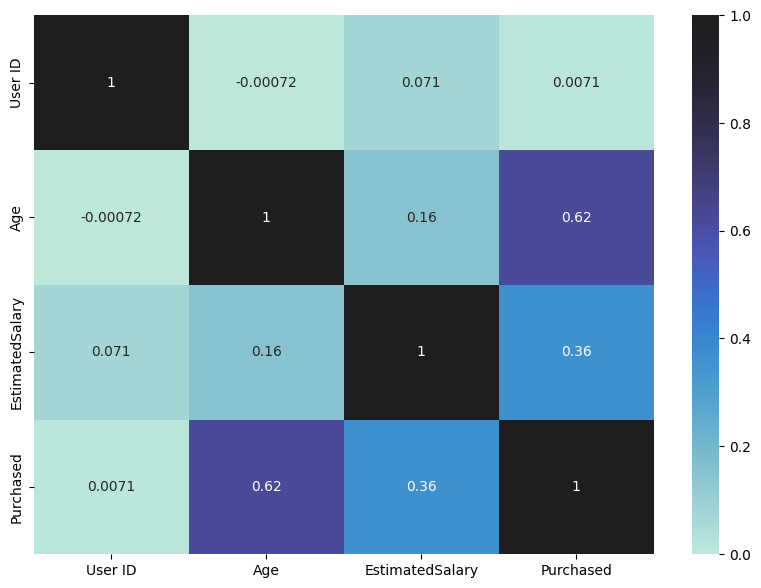

In [8]:
# Check correlation between dependent and independent variable
plt.figure(figsize=(10,7))
sns.heatmap(data=ads.corr(),annot=True,center=True,cbar=True)
plt.plot()

In [9]:
from sklearn import preprocessing

In [34]:
label_encoder = preprocessing.LabelEncoder()
ads1 = ads
ads1.head(10)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0
5,15728773,1,27,58000,0
6,15598044,0,27,84000,0
7,15694829,0,32,150000,1
8,15600575,1,25,33000,0
9,15727311,0,35,65000,0


In [11]:
ads1['Gender'] = label_encoder.fit_transform(ads1['Gender'])
ads1['Gender'].unique()

array([1, 0])

In [36]:
np.where(ads1['Purchased'] == 1)

(array([  7,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,
         31,  48,  63,  75,  85,  97, 103, 137, 146, 159, 160, 168, 182,
        202, 204, 206, 208, 210, 211, 215, 219, 221, 222, 223, 226, 227,
        229, 230, 232, 233, 235, 239, 240, 242, 243, 245, 247, 249, 252,
        253, 255, 258, 259, 261, 262, 264, 265, 268, 271, 272, 273, 274,
        275, 277, 278, 279, 280, 282, 283, 285, 287, 289, 290, 291, 292,
        296, 297, 299, 300, 301, 302, 303, 307, 308, 311, 313, 315, 316,
        318, 320, 321, 323, 324, 328, 329, 331, 334, 336, 339, 340, 343,
        344, 346, 347, 350, 352, 354, 355, 356, 358, 360, 361, 362, 364,
        365, 366, 367, 369, 370, 371, 373, 375, 378, 379, 381, 382, 383,
        384, 385, 386, 388, 389, 390, 391, 392, 393, 395, 396, 397, 399]),)

[]

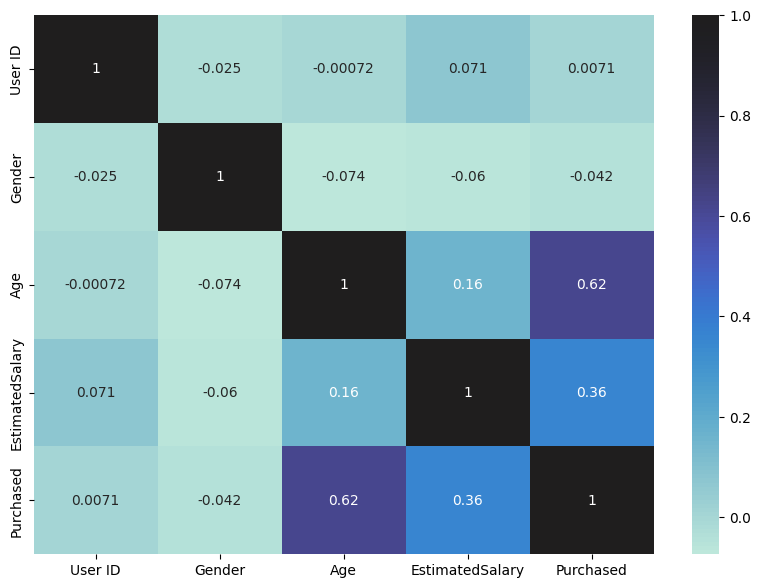

In [12]:
plt.figure(figsize=(10,7))
sns.heatmap(data=ads1.corr(),annot=True,center=True,cbar=True)
plt.plot()

In [13]:
X = ads.iloc[:,[2,3]].values
y = ads.iloc[:,4].values

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=0)

In [16]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [18]:
# Fitting Logistic Regression to training dataset
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train,y_train)

LogisticRegression()

In [19]:
# Predict the test results
y_pred = classifier.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 1])

### **CONFUSION MATRIX**

In [38]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

print(f"Confusion Matrix: \n {confusion_matrix(y_test,y_pred)}")
print(f"Accuracy Score: {accuracy_score(y_test,y_pred)}")

Confusion Matrix: 
 [[74  5]
 [11 30]]
Accuracy Score: 0.8666666666666667


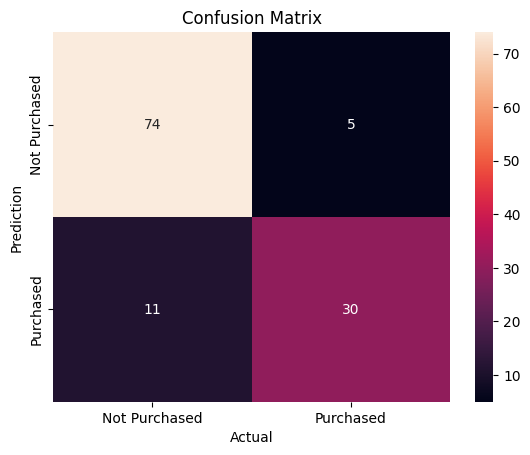

In [24]:
# Plot the confusion matrix using heatmap
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,xticklabels=['Not Purchased','Purchased'],yticklabels=['Not Purchased','Purchased'])
plt.ylabel('Prediction')
plt.xlabel('Actual')
plt.title("Confusion Matrix")
plt.show()

In [41]:
# Classification Report for metrics of confusion matrix
print(f"Confusion Matrix Metrics: \n {classification_report(y_test,y_pred)}")

Confusion Matrix Metrics: 
               precision    recall  f1-score   support

           0       0.87      0.94      0.90        79
           1       0.86      0.73      0.79        41

    accuracy                           0.87       120
   macro avg       0.86      0.83      0.85       120
weighted avg       0.87      0.87      0.86       120

